In [2]:
#train data Preprocessing 

import pandas as pd
pd.options.display.max_columns = 100
fpath = './Data/train.csv'
train = pd.read_csv(fpath)

#test data Preprocessing
import pandas as pd
pd.options.display.max_columns = 100
fpath = './Data/test.csv'
test = pd.read_csv(fpath)


In [86]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24840 entries, 0 to 24839
Data columns (total 14 columns):
Unnamed: 0          24840 non-null int64
date                24840 non-null object
org                 23563 non-null object
tld                 23563 non-null object
ccs                 24840 non-null int64
bcced               24840 non-null int64
mail_type           24769 non-null object
images              24840 non-null int64
urls                24840 non-null int64
salutations         24840 non-null int64
designation         24840 non-null int64
chars_in_subject    24840 non-null int64
chars_in_body       24840 non-null int64
label               24840 non-null int64
dtypes: int64(10), object(4)
memory usage: 2.7+ MB


In [4]:
#Split the target variables into the training variables and the label


df = train.iloc[:,1:14]    # the training variables data frame

# note train is a pandas data frame so we select columns from it using     .loc

label = train.iloc[:,-1]    #the labels


#*******NOTE - here, we have dropped the first column beacuse it was just the serial number

# same operation for the test data, we drop the first variable

df2 = test.iloc[:,1:13]


In [25]:
# #Clean the timezone stamps form the date column

#the below code make the date column ready for extraction by the 

from dateutil import parser
import bisect

for x in df['date']:
    if '(GMT+' in x :
        df = df.replace({'date': {x: x.split(
            '(')[0]}})

        
df['date']=pd.to_datetime(df['date'], utc = True)

df['date'] = pd.to_datetime(df['date'])

# ## this is the code for parsing, we can use this as well, but is very case specfic and does not work in every case. 
# # for ex - it did not work in this case.

# df['date'] = df['date'].str.replace(r' .*.∗', '')
# df['date'] = df['date'].str.rstrip()
# df['date'] = df['date'].str.replace('-0000', '+0000')
# df['date'] = df['date'].str.replace('0580', '0530')
# df['date'] = df['date'].apply(dateparser.parse, languages=['en'])

# # the below code extracts the time, year, monthe etc from the cleansed date and everythig is an Int64 so it is fine.

df['year'] = df['date'].apply(lambda x:x.year)
df['month'] = df['date'].apply(lambda x:x.month)
df['day'] = df['date'].apply(lambda x:x.day)
df['hour'] = df['date'].apply(lambda x:x.hour)
df['minute'] = df['date'].apply(lambda x:x.minute)
df['second'] = df['date'].apply(lambda x:x.second)
df['weekday'] = df['date'].apply(lambda x:x.weekday())



#--------- PARSING FROM THE TEST DATA --------------------

from dateutil import parser
import bisect

for x in df2['date']:
    if '(GMT+' in x :
        df2 = df2.replace({'date': {x: x.split(
            '(')[0]}})

        
df2['date']=pd.to_datetime(df2['date'], utc = True)

df2['date'] = pd.to_datetime(df2['date'])

# ## this is the code for parsing, we can use this as well, but is very case specfic and does not work in every case. 
# # for ex - it did not work in this case.

# df['date'] = df['date'].str.replace(r' .*.∗', '')
# df['date'] = df['date'].str.rstrip()
# df['date'] = df['date'].str.replace('-0000', '+0000')
# df['date'] = df['date'].str.replace('0580', '0530')
# df['date'] = df['date'].apply(dateparser.parse, languages=['en'])

# # the below code extracts the time, year, monthe etc from the cleansed date and everythig is an Int64 so it is fine.

df2['year'] = df2['date'].apply(lambda x:x.year)
df2['month'] = df2['date'].apply(lambda x:x.month)
df2['day'] = df2['date'].apply(lambda x:x.day)
df2['hour'] = df2['date'].apply(lambda x:x.hour)
df2['minute'] = df2['date'].apply(lambda x:x.minute)
df2['second'] = df2['date'].apply(lambda x:x.second)
df2['weekday'] = df2['date'].apply(lambda x:x.weekday())

In [89]:
df.head()

,date,org,tld,ccs,bcced,mail_type,images,urls,salutations,designation,chars_in_subject,chars_in_body,label,year,month,day,hour,minute,second,weekday
0,2016-08-28 00:17:44+00:00,amazon,in,0,0,multipart/mixed,0,0,0,0,102,4,3,2016,8,28,0,17,44,6
1,2016-06-13 07:17:24+00:00,linkedin,com,0,0,multipart/alternative,15,44,0,0,55,35444,1,2016,6,13,7,17,24,0
2,2017-11-21 13:03:34+00:00,quora,com,0,0,multipart/alternative,12,110,1,1,59,100770,1,2017,11,21,13,3,34,1
3,2016-08-03 06:52:52+00:00,iiitd,ac.in,0,0,multipart/alternative,0,0,0,0,8,117,2,2016,8,3,6,52,52,2
4,2019-02-14 09:37:30+00:00,mail,paypal.com,0,0,multipart/alternative,5,49,1,0,42,36472,3,2019,2,14,9,37,30,3


# Function to create a bucket for time and day
## Approach 1 - working day Monday to Friday, 8 AM to 6 PM


In [26]:
def flag_df(df):

    if (8 <= df['hour'] <= 18) and (df['weekday'] <= 5):
        return '1'
    else:
        return '0'

df['work_flag'] = df.apply(flag_df, axis = 1)

# that is how you do it, apply - lambda works on one condition in multiple cilumns but not on mutilple 
#conditions on multiple columns

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24840 entries, 0 to 24839
Data columns (total 22 columns):
date                       24840 non-null datetime64[ns, UTC]
org                        23563 non-null object
tld                        23563 non-null object
ccs                        24840 non-null int64
bcced                      24840 non-null int64
mail_type                  24769 non-null object
images                     24840 non-null int64
urls                       24840 non-null int64
salutations                24840 non-null int64
designation                24840 non-null int64
chars_in_subject           24840 non-null int64
chars_in_body              24840 non-null int64
label                      24840 non-null int64
chars_in_subject_binned    24840 non-null int64
year                       24840 non-null int64
month                      24840 non-null int64
day                        24840 non-null int64
hour                       24840 non-null int64
minute    

# Approach 2 - Create 3 buckets for time and 2 for day
4 PM - 12PM - 1

12 AM - 8 AM - 2

8 AM - 4 PM  - 3

# for the days, we can have buckets as

 days 6,7 - weekend
 days - 1-5 as weekdays

See the graphs below and let us discuss it

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029E21096C88>,
      dtype=object)

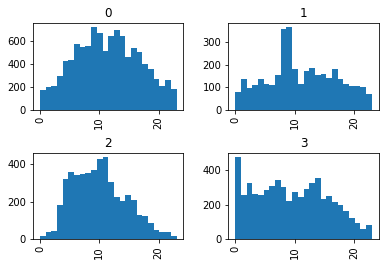

In [94]:
import matplotlib.pyplot as plt

df.hist(column='hour', by = 'label', bins = 24)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029E25203160>,
      dtype=object)

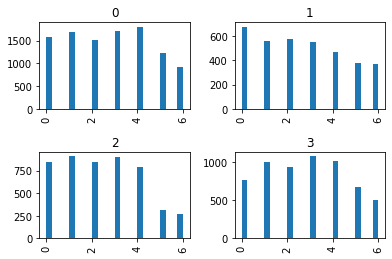

In [95]:
import matplotlib.pyplot as plt
df.hist(column='weekday', by = 'label', bins = 24)

In [29]:
def hour_flag(df):

    if (16 <= df['hour'] < 24):
        return '0'
    elif(0 <= df['hour'] < 8):
        return '1'
    elif(8 <= df['hour'] < 16):
        return '2'

df['hour_flag'] = df.apply(hour_flag, axis = 1)

# that is how you do it, apply - lambda works on one condition in multiple cilumns but not on mutilple 
#conditions on multiple columns

In [30]:
def day_flag(df):

    if (df['weekday'] <= 5):
        return '0'
    else:
        return '1'

df['day_flag'] = df.apply(day_flag, axis = 1)

# that is how you do it, apply - lambda works on one condition in multiple cilumns but not on mutilple 
#conditions on multiple columns

# Making buckets for the characters in the body and heading

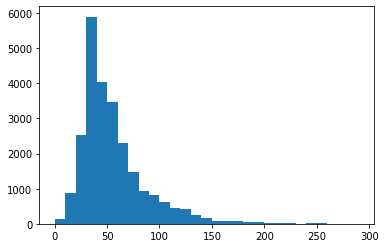

In [19]:
plt.hist(df['chars_in_subject'], bins = list(np.arange(0, 300, 10)))
df['chars_in_subject_binned'] = np.searchsorted(list(np.arange(0, 300, 10)), df['chars_in_subject'].values)

# for char in SUBJECT - 

## we can have the following buckets:

char >150 - 1

70 < char < 150 -2

20 < char < 70 -3

Char < 20 - 4

In [31]:
def char_subj_flag(df):

    if (df['chars_in_subject'] >= 150):
        return '0'
    elif(70 <= df['chars_in_subject'] < 150 ):
        return '1'
    elif(20 <= df['chars_in_subject'] < 70):
        return '2'
    elif( df['chars_in_subject'] < 20):
        return '3'

df['char_subj_flag'] = df.apply(char_subj_flag, axis = 1)

# that is how you do it, apply - lambda works on one condition in multiple cilumns but not on mutilple 
#conditions on multiple columns

60769114


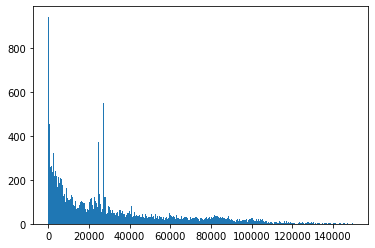

In [17]:
plt.hist(df['chars_in_body'], bins = list(np.arange(0, 150000, 300))) # put this into action?
print(max(df['chars_in_body']))

In [69]:
df['chars_in_body'].value_counts()[:10].index.tolist()

[4, 1210, 548, 1641, 16428, 21096, 869, 690, 533, 680]

(array([33.,  4.,  5.,  6.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([4.0000000e+00, 8.4160800e+03, 1.6828160e+04, 2.5240240e+04,
        3.3652320e+04, 4.2064400e+04, 5.0476480e+04, 5.8888560e+04,
        6.7300640e+04, 7.5712720e+04, 8.4124800e+04, 9.2536880e+04,
        1.0094896e+05, 1.0936104e+05, 1.1777312e+05, 1.2618520e+05,
        1.3459728e+05, 1.4300936e+05, 1.5142144e+05, 1.5983352e+05,
        1.6824560e+05, 1.7665768e+05, 1.8506976e+05, 1.9348184e+05,
        2.0189392e+05, 2.1030600e+05, 2.1871808e+05, 2.2713016e+05,
        2.3554224e+05, 2.4395432e+05, 2.5236640e+05, 2.6077848e+05,
        2.6919056e+05, 2.7760264e+05, 2.8601472e+05, 2.9442680e+05,
        3.0283888e+05, 3.1125096e+05, 3.1966304e+05, 3.2807512e+05,
        3.3648720e+05, 3.4489928e+05

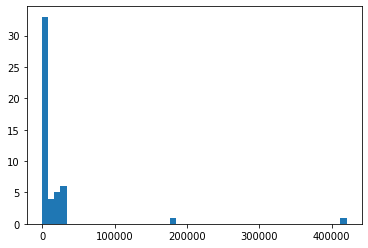

In [68]:
plt.hist(df['chars_in_body'].value_counts()[:50].index.tolist(), bins = 50)

(array([6., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 1.]),
 array([4.00000e+00, 1.05860e+03, 2.11320e+03, 3.16780e+03, 4.22240e+03,
        5.27700e+03, 6.33160e+03, 7.38620e+03, 8.44080e+03, 9.49540e+03,
        1.05500e+04, 1.16046e+04, 1.26592e+04, 1.37138e+04, 1.47684e+04,
        1.58230e+04, 1.68776e+04, 1.79322e+04, 1.89868e+04, 2.00414e+04,
        2.10960e+04]),
 <a list of 20 Patch objects>)

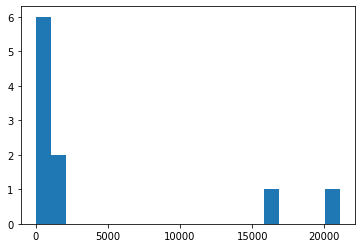

In [67]:
plt.hist(df['chars_in_body'].value_counts()[:10].index.tolist(), bins = 20)

# for char in BODY - 

## we can have the following buckets:

char < 4000 - 1

4000 < char < 3000 -2

3000 < char < 2000 -3

2000 < Char < 1000 - 4

Char < 1000 - 5

In [87]:
def char_main_flag(df):

    if (df['chars_in_subject'] > 4000):
        return 'int(0)'
    elif(4000 <= df['chars_in_subject'] < 3000 ):
        return int(1)
    elif(3000 <= df['chars_in_subject'] < 2000):
        return int(2)
    elif(2000 <= df['chars_in_subject'] < 1000):
        return int(3)
    elif( df['chars_in_subject'] < 1000):
        return int(4)

df['char_main_flag'] = df.apply(char_main_flag, axis = 1)
df['char_main_flag'].astype(str).astype(int)
# that is how you do it, apply - lambda works on one condition in multiple cilumns but not on mutilple 
#conditions on multiple columns

0        4
1        4
2        4
3        4
4        4
5        4
6        4
7        4
8        4
9        4
10       4
11       4
12       4
13       4
14       4
15       4
16       4
17       4
18       4
19       4
20       4
21       4
22       4
23       4
24       4
25       4
26       4
27       4
28       4
29       4
        ..
24810    4
24811    4
24812    4
24813    4
24814    4
24815    4
24816    4
24817    4
24818    4
24819    4
24820    4
24821    4
24822    4
24823    4
24824    4
24825    4
24826    4
24827    4
24828    4
24829    4
24830    4
24831    4
24832    4
24833    4
24834    4
24835    4
24836    4
24837    4
24838    4
24839    4
Name: char_main_flag, Length: 24840, dtype: int32

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24840 entries, 0 to 24839
Data columns (total 26 columns):
date                       24840 non-null datetime64[ns, UTC]
org                        23563 non-null object
tld                        23563 non-null object
ccs                        24840 non-null int64
bcced                      24840 non-null int64
mail_type                  24769 non-null object
images                     24840 non-null int64
urls                       24840 non-null int64
salutations                24840 non-null int64
designation                24840 non-null int64
chars_in_subject           24840 non-null int64
chars_in_body              24840 non-null int64
label                      24840 non-null int64
chars_in_subject_binned    24840 non-null int64
year                       24840 non-null int64
month                      24840 non-null int64
day                        24840 non-null int64
hour                       24840 non-null int64
minute    